In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df=pd.read_csv("car data.csv")
df.shape

(301, 9)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


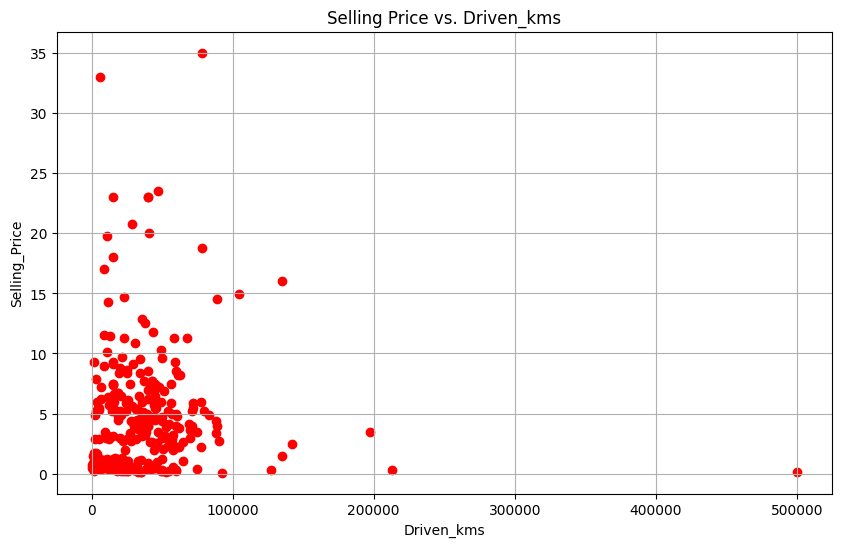

In [9]:
#scatter plot for identifying relation between selling price and driven kms
plt.figure(figsize=(10, 6))
plt.scatter(df['Driven_kms'], df['Selling_Price'], color='Red', marker='o')
plt.title('Selling Price vs. Driven_kms')
plt.xlabel('Driven_kms')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

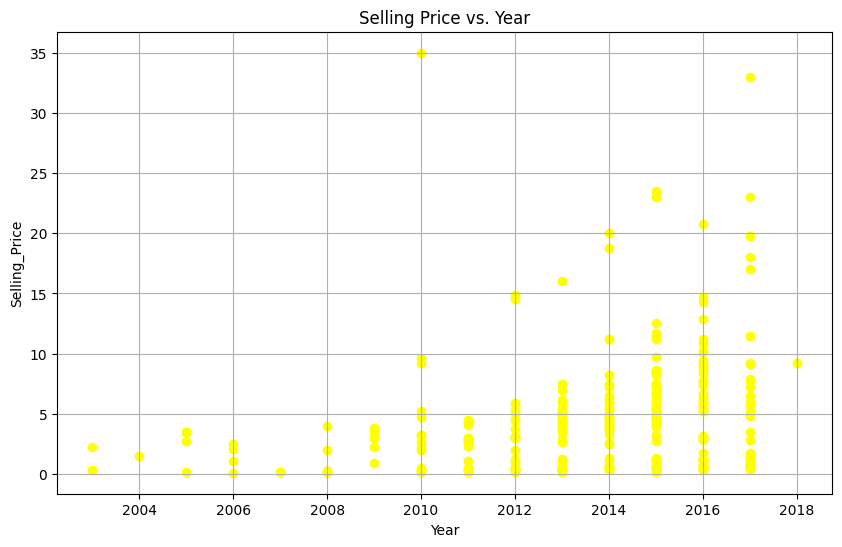

In [11]:
#visualising the relationship between selling price and year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Selling_Price'], color='yellow', marker='o')
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

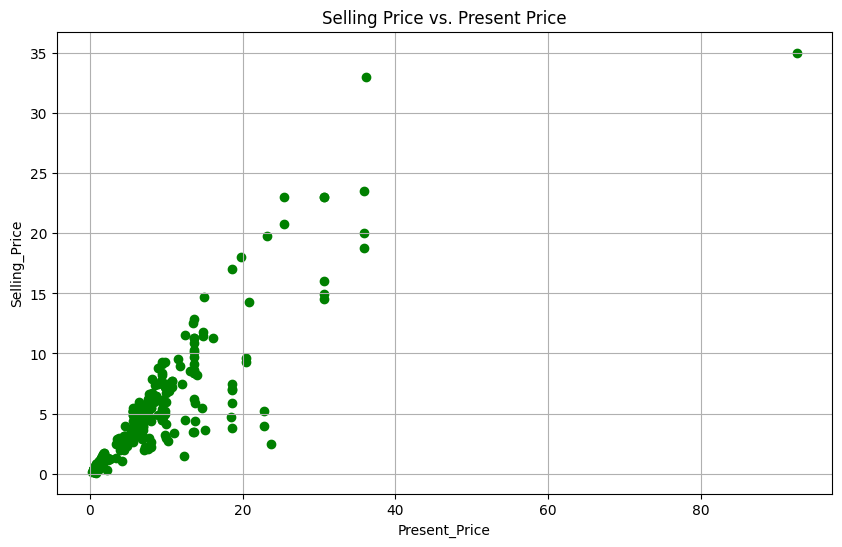

In [12]:
#visualising the relation between selling price and present price
plt.figure(figsize=(10, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], color='Green', marker='o')
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

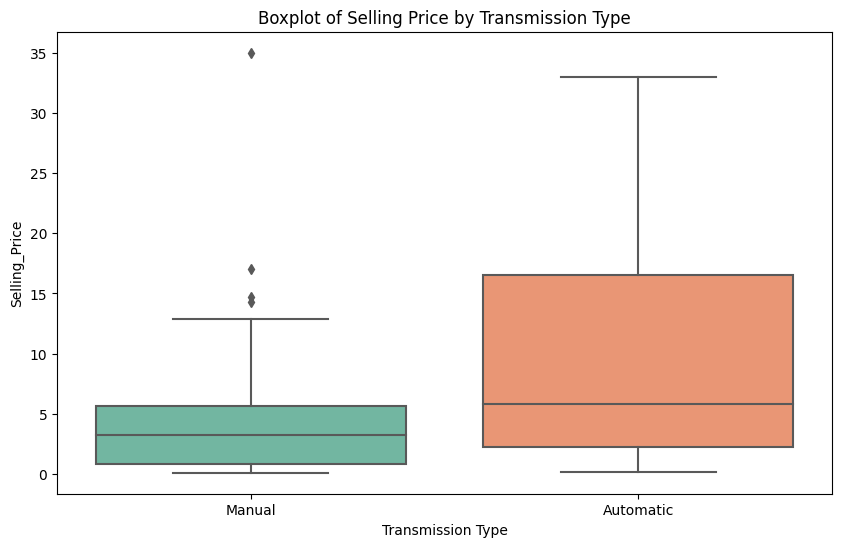

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling_Price')
plt.show()

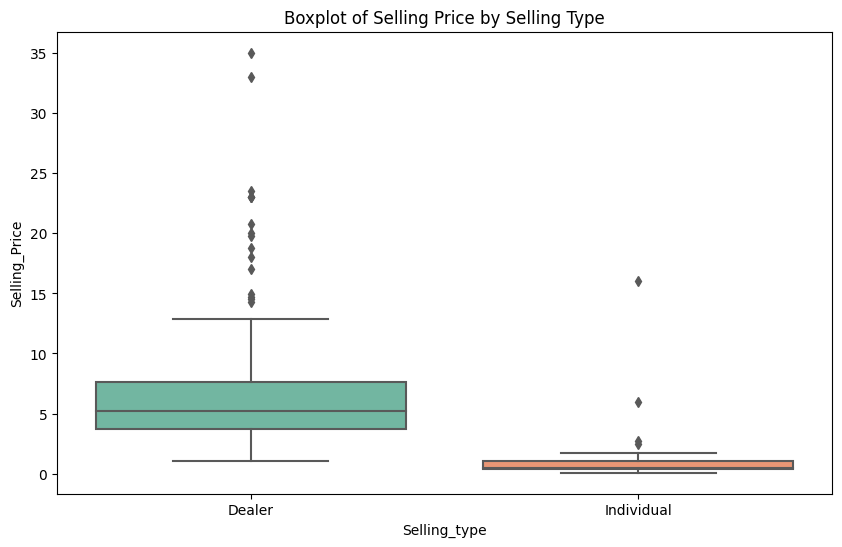

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Selling Type')
plt.xlabel('Selling_type')
plt.ylabel('Selling_Price')
plt.show()


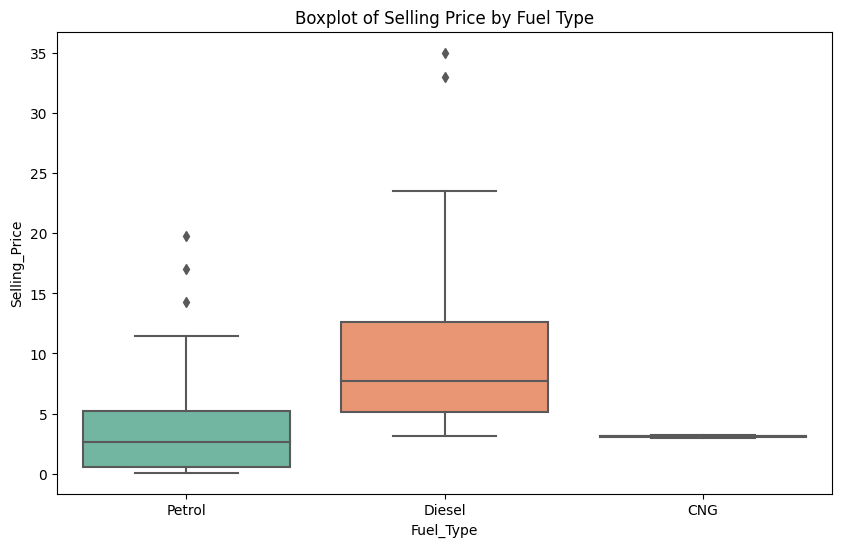

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Fuel Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.show()

<ipython-input-16-f990ea184b10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


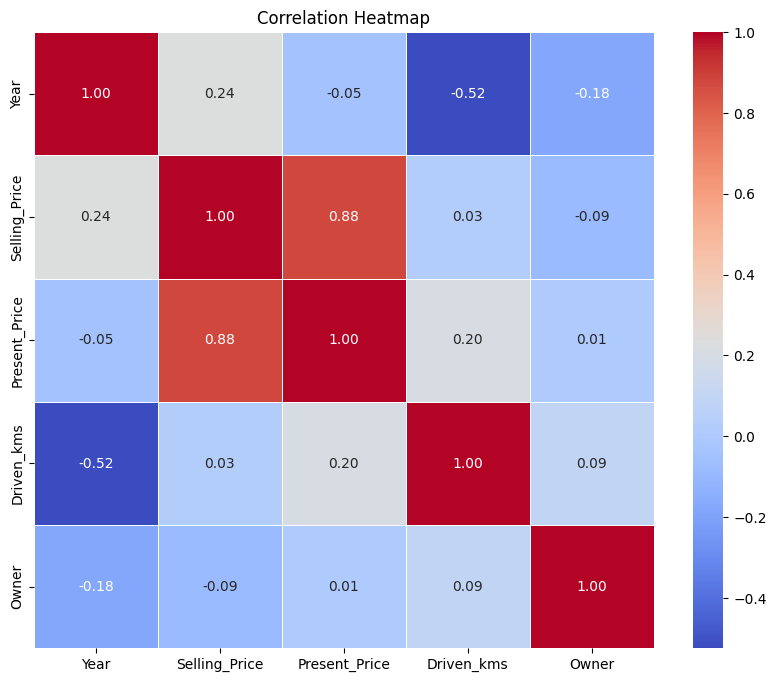

In [16]:
correlation_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
#Splitting the data
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [19]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [20]:
#Model Training(Linear Regression)
# loading the linear regression model
lin_reg_model = LinearRegression()

In [21]:

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
#Model Evaluation
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370215


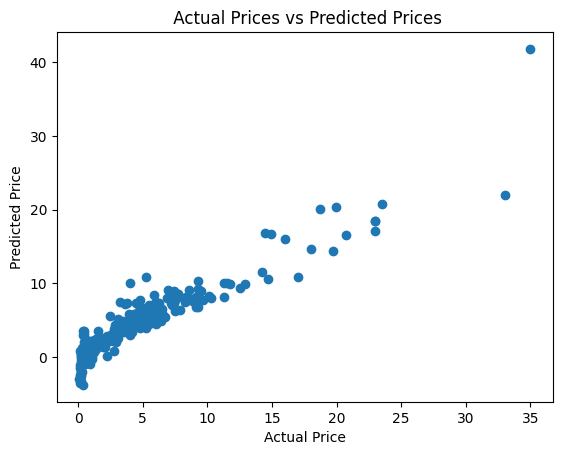

In [23]:
#Visualize the actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [24]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023210703


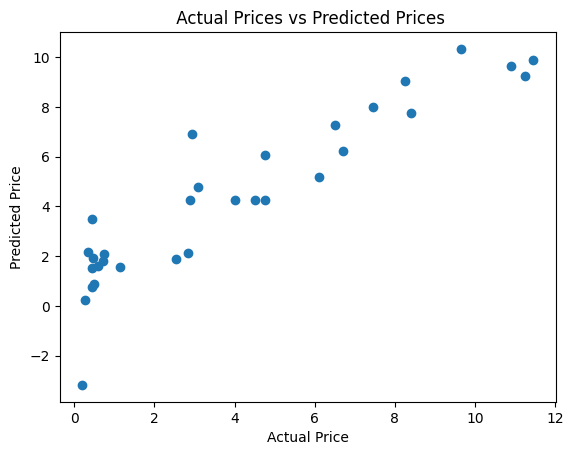

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()